# **< 전국 >**
# 1. 관계 시각화 탐색
## 1) 종속변수 target 1 (출산율) VS 독립변수

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = 'C:/playdata/To_raise_a_child_well/data/dohee/'
sum_df = pd.read_excel(path+'전국데이터프레임2006_2021.xlsx', index_col = 0)
len(sum_df.columns)

11

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(sum_df.values)
sum_df = pd.DataFrame(x, index = sum_df.index, columns = sum_df.columns)
sum_df

,실업률,이혼율,고령화비율,혼인건수,소비자물가지수,출산아수/가임기여성의수,아파트전세지수,미분양주택지수,은행예금지수,경제활동참가율,지가변동률
시점,,,,,,,,,,,
1999-06-01,3.230027,-1.479453,NaN,1.976175,-1.834308,NaN,NaN,NaN,NaN,-1.034816,NaN
1999-07-01,3.230027,-0.444523,NaN,0.093044,-1.849994,NaN,NaN,NaN,NaN,-1.193990,NaN
1999-08-01,2.377624,0.645741,NaN,-0.998329,-1.803087,NaN,NaN,NaN,NaN,-1.512337,NaN
1999-09-01,1.241087,1.534845,NaN,-1.475620,-1.791378,NaN,NaN,NaN,NaN,-0.928700,NaN
1999-10-01,0.956952,-0.277444,NaN,-0.038158,-1.756254,NaN,NaN,NaN,NaN,-0.769527,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,-1.174055,NaN,1.994510,NaN,1.736737,-1.887424,1.522411,1.522411,2.146835,2.201717,NaN
2022-10-01,-1.316122,NaN,2.034774,NaN,1.757751,-1.887424,1.444818,1.444818,2.169465,2.148659,NaN
2022-11-01,-1.458189,NaN,2.034774,NaN,1.749496,-1.887424,1.311802,1.311802,2.177997,2.201717,NaN


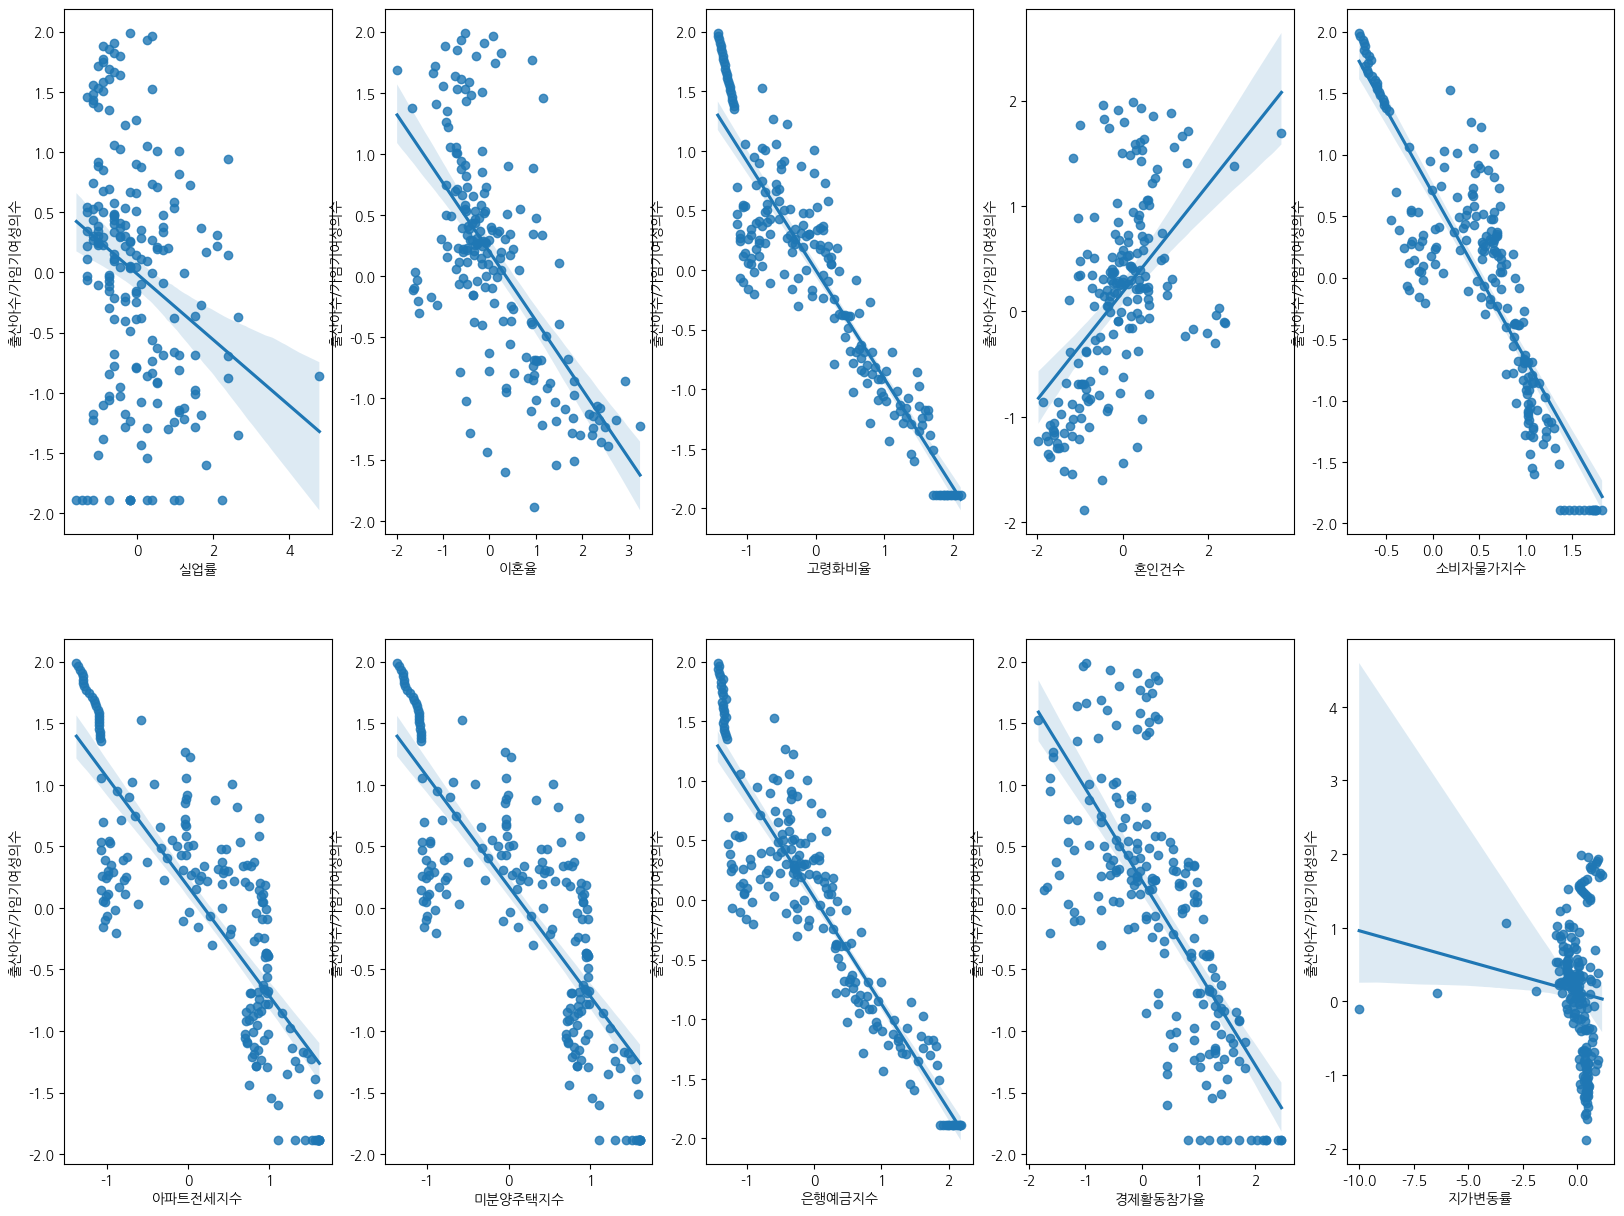

In [33]:
# [1] 비교할 열 선택
d_feature  = [c for c in list(sum_df.drop('출산아수/가임기여성의수', axis=1).loc['2006-01-01' : '2021-12-01'].columns)]

# [2] 캔버스 준비 및 axes 그리기
import seaborn as sns
import matplotlib as mpl
mpl.rc('font', family='NanumGothic', size = 10)
plt.rc('axes', unicode_minus=False)

fix, ax = plt.subplots(figsize = (20, 15), nrows = 2, ncols = 5)
for idx, feature in enumerate(d_feature) :
    row = idx // 5
    col = idx % 5
    sns.regplot(x = feature, y = '출산아수/가임기여성의수', data = sum_df, ax = ax[row][col]) 
    # 가임기여성(고용률과 실업률),입양아은 2차 eda한번 하고, academy, park, market, total_sport_fc, total_apart, Financial_idp, 

## 3) 독립변수 간 상관 관계 (히트맵)
상관계수(r) 확인 및 p-value 확인
* 상관계수 : 적을수록 좋은 것<br>

--------------------------------------------<br>
* P-value 의미 : 샘플 데이터의 결과가 우연에 의해서 나타날 수 있다는 가능성(확률)
* 0% ~ 100% 중 5% = 0.05 로 표시
* P-value가 작을수록 좋은 것 = 결과가 우연에 의해 나타날 가능성이 작다는 의미 = 샘플 결과가 타당하다

## [1] 비슷한 독립변수 상관관계

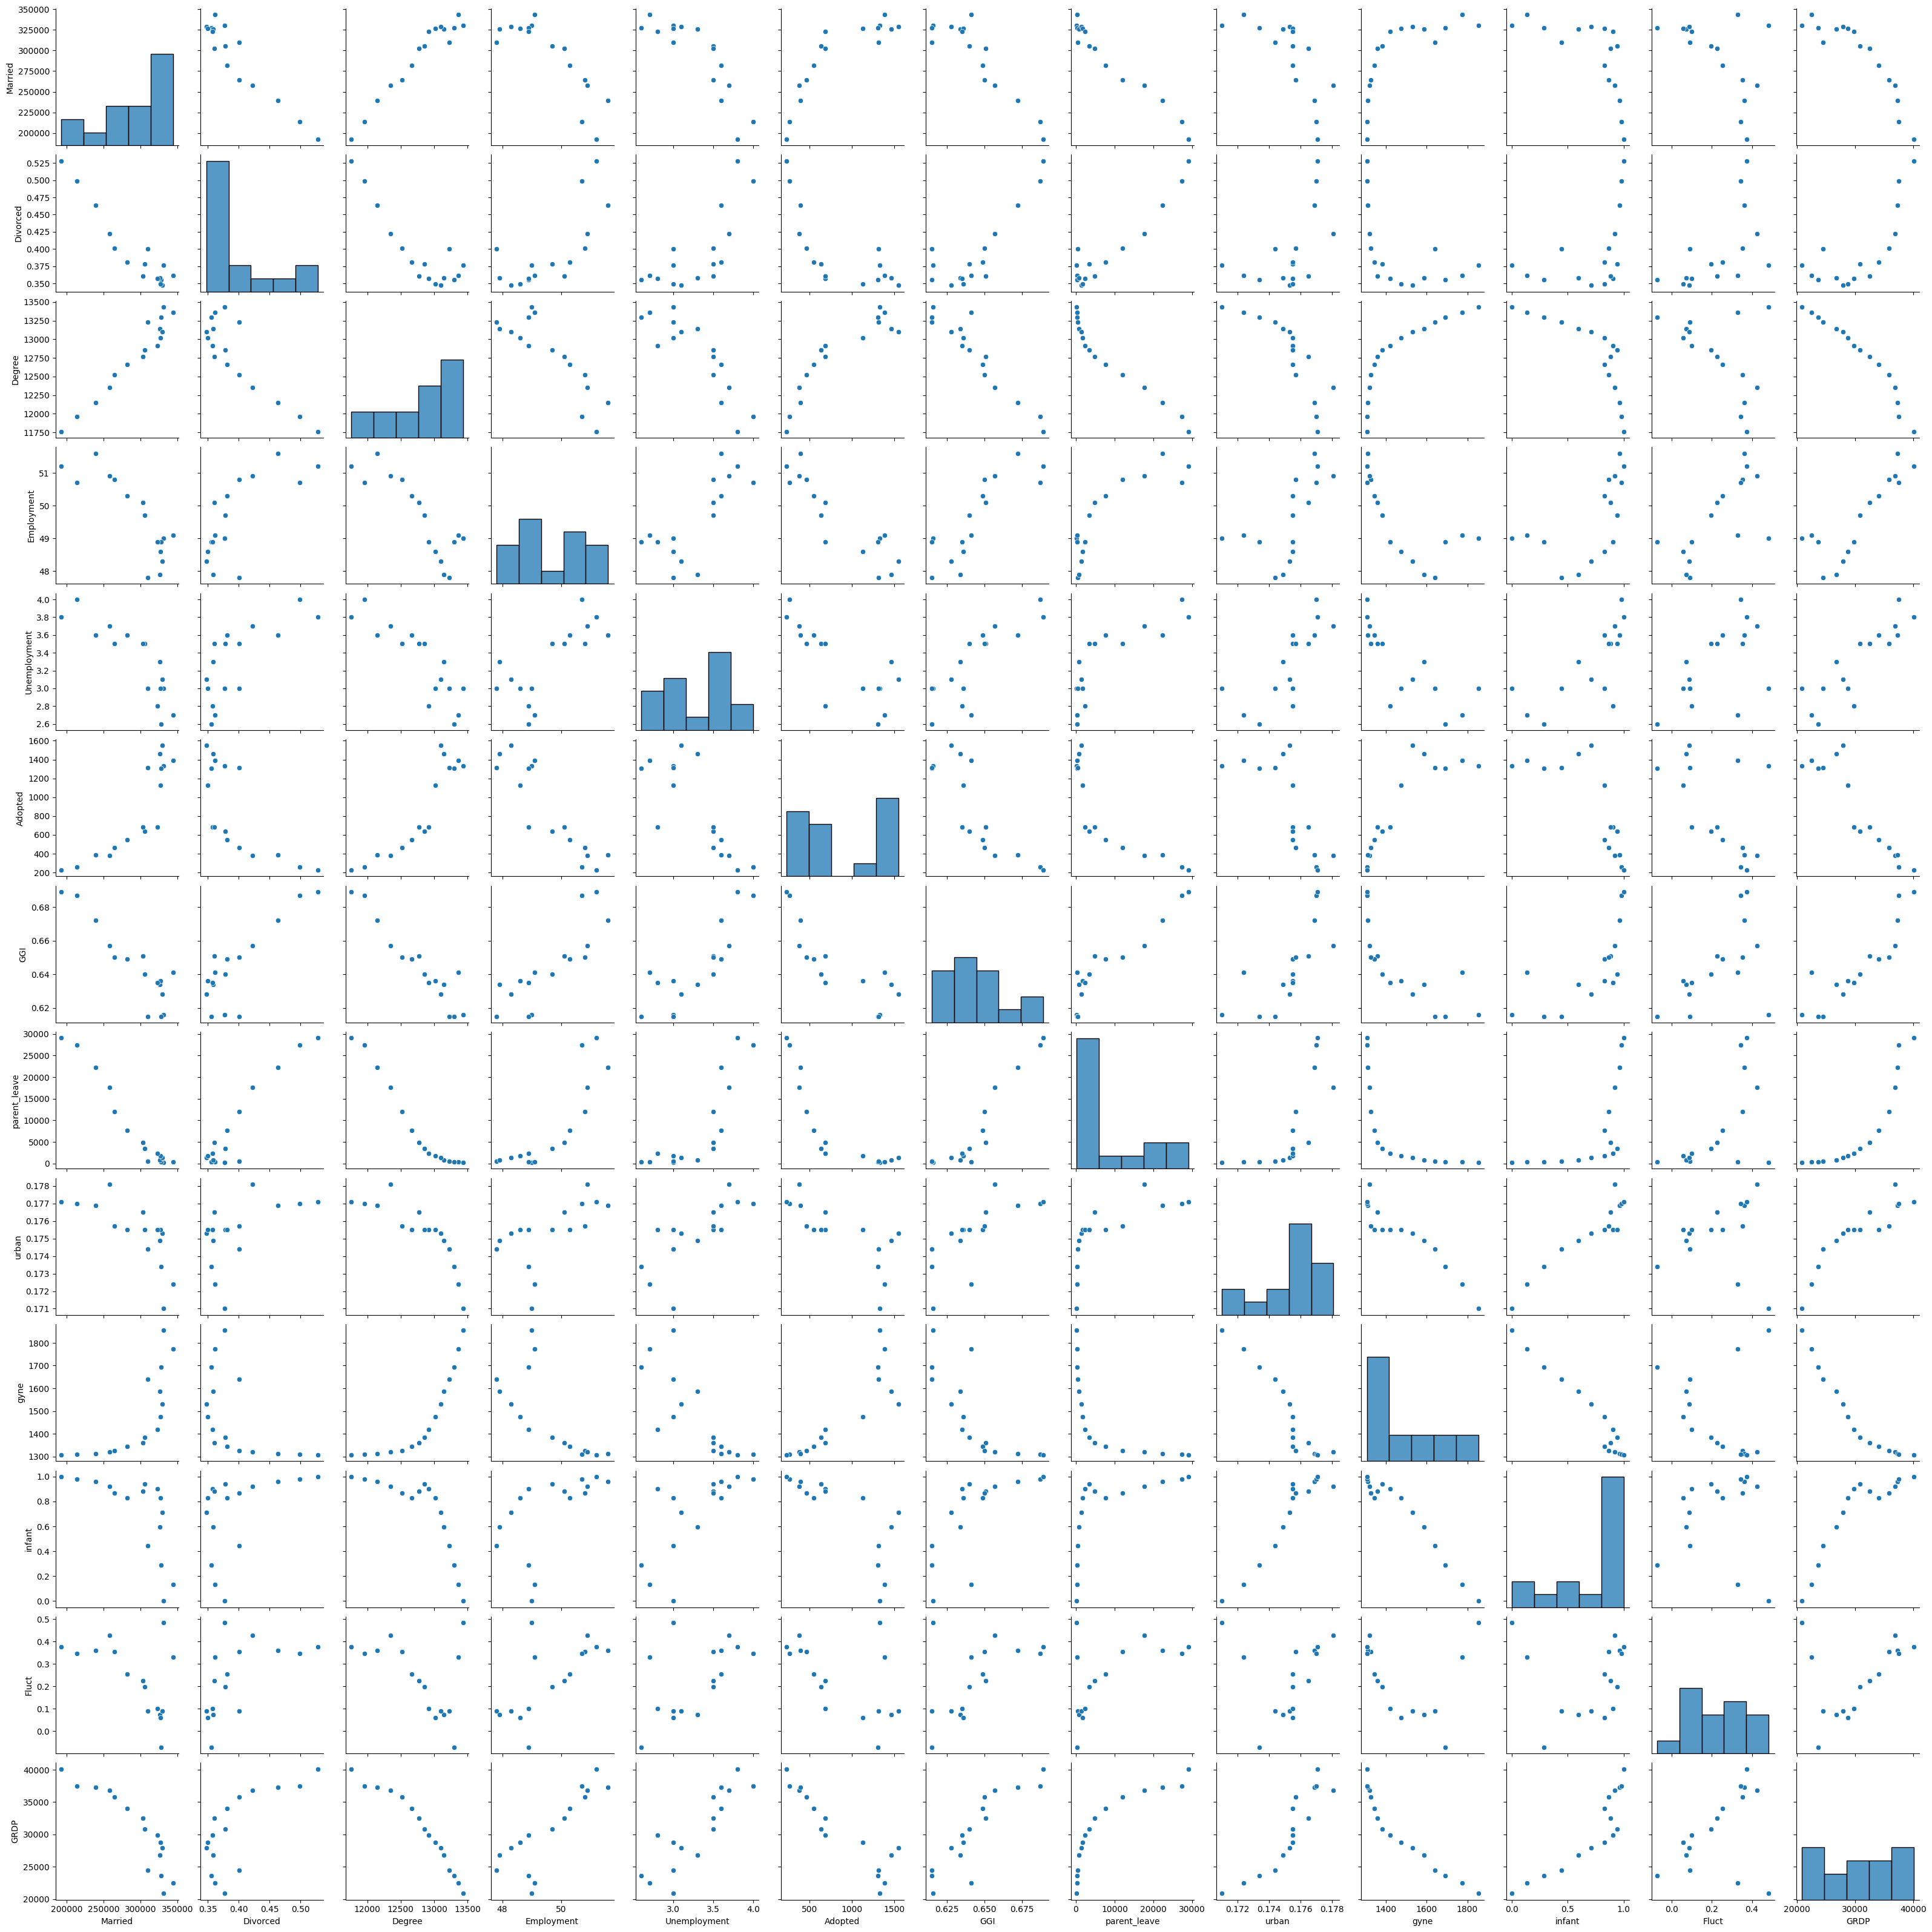

In [94]:
features = fertility_df_.drop(columns=['Target','Total_apart','Academy','park','Market','sports_fc','Total_apart','Financial_idp']).columns
sns.pairplot(fertility_df_[features])

## [2] 전체 독립변수 간 상관관계

#### 상관관계를 확인한 후 값들의 분포가 극과 극으로 모두 상관관계가 높아 절대값이 0.9 이상인 것을 기준으로 변수 조정 작업을 시작한다

- 음의 상관관계가 0.9를 넘는 경우
  - Degree(학위)와 GGI(성평등 지수)가 -0.95, Degree(학위)와 parent leave(남성의 육아휴직)가 -0.95, Degree(학위)와 GRDP(지역의 총 생산)이 -0.96, Adopted(입양아 수)와 GRDP(지역의 총 생산), urban과 gyne이 -0.94, gyne와 infant가 -0.97, gyne와 GRDP가 -0.95 
>  - 음의 상관관계가 0.9를 넘으면서 객관적으로 겹치는 개념인 경우
>    - 혼인건수와 최종학력, 입양아 수와 이혼(아닌거 같은데? 확인해야함), Employment(여성 고용율)과 Adopted(입양아 수)가 -0.9?
>  - 음의 상관관계가 0.9를 넘으면서 결과가 의아한 경우
>    - Married와 GGI(양의 상관관계가 아니네? 왜 그렇지?), Married와 parent_leave(남성의 육아휴직)이 -0.98?
>    - GRDP(지역의 총 생산)과 Divorced(이혼)이 -0.96? 
>    - 
- 양의 상관관계가 0.9를 넘는 경우
  - Married(결혼)과 Degree(학위)가 0.97, Degree(학위)와 Adopted(입양아 수)가 0.9, GGI(성평등 지수)와 parent leave(남성의 육아휴직)이 0.93, urban과 infant가 0.94, urban과 GRDP가 0.9, 
>  - 양의 상관관계가 0.9를 넘으면서 객관적으로 겹치는 개념인 경우
>    - Degree(학위)와 Adopted(입양아 수)
>  - 양의 상관관계가 0.9를 넘으면서 결과가 의아한 경우
>    - 남성육아휴직과 이혼이 0.95?, 

<AxesSubplot:>

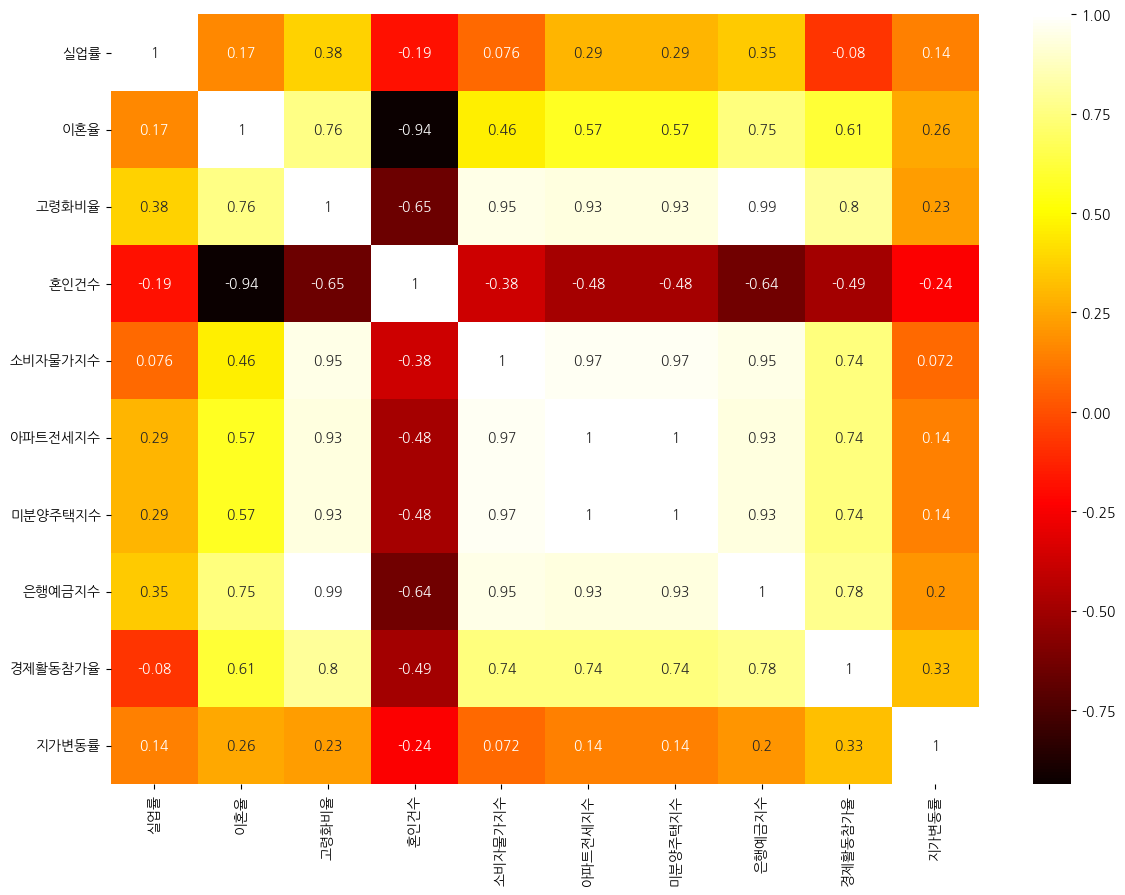

In [20]:
features = sum_df.drop('출산아수/가임기여성의수', axis=1).columns
corr_df = sum_df[features].corr() # 월별로 모을 수 있는 것들 
plt.figure(figsize=(14,10))
sns.heatmap(corr_df, annot = True,cmap='hot') 

#### [3] 상관계수(r)와 p-value 확인하기
- 피어슨 상관계수 함수 : stats.pearsonr

from scipy import stats

stats.pearsonr(x1, x2)
(0.9626907371412556, 8.103391267431583e-06)
첫번째 : 상관계수  |  두번째 : p-value

In [24]:
sum_df['이혼율'].values

시점
1999-06-01   -1.479453
1999-07-01   -0.444523
1999-08-01    0.645741
1999-09-01    1.534845
1999-10-01   -0.277444
                ...   
2022-09-01         NaN
2022-10-01         NaN
2022-11-01         NaN
2022-12-01         NaN
2023-01-01         NaN
Name: 이혼율, Length: 284, dtype: float64

In [27]:
from scipy import stats

stats.pearsonr(sum_df['이혼율'].loc['2006-01-01' : '2021-12-01'].values, sum_df['혼인건수'].loc['2006-01-01' : '2021-12-01'].values)

PearsonRResult(statistic=-0.9423134863852162, pvalue=3.019292415794836e-92)

<hr>

#### 결과
상관계수가 0.85 이상인 독립변수 처리<br>
(1) 한 개의 대표 변수를 선별<br>
(2) 상관성을 줄이기 위하여 독립변수 변환<br>

# 2. 특성중요도

In [ ]:
Plot_importance
xgb.feature_importances_

# 3. 결측값 대체 (전국)
#### **21개 columns = 독립변수 + target 2개**

⇒ 각 독립변수 별로 결측값 대체 방법 설정 필요<br>

--------------------------------------------------<br>
target 1 : 합계출산율<br>
target 2 : 총 출생아 수<br>
columns = 독립변수 (출생아에 영향을 주는 요인)<br>
index = 연도<br>
---------------------------------------------------<br>

- 전체 데이터 : shape(16, 21) => values : 336개<br>
   - 30% 이상(100개 이상) => 결측율이 높아 결측값 대체 없이 원자료로 진행 (값을 0으로 두고)
   - 30% 미만 (100개 미만) => 결측값 대체